<a href="https://colab.research.google.com/github/avner8943/bootcamp/blob/master/DIP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Q1

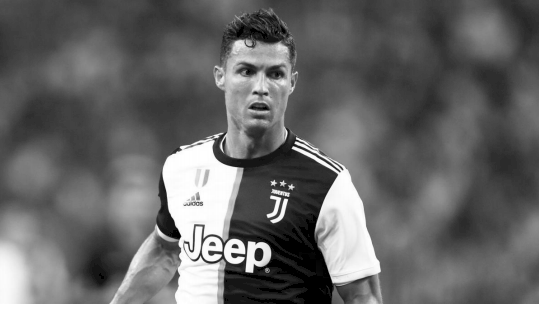

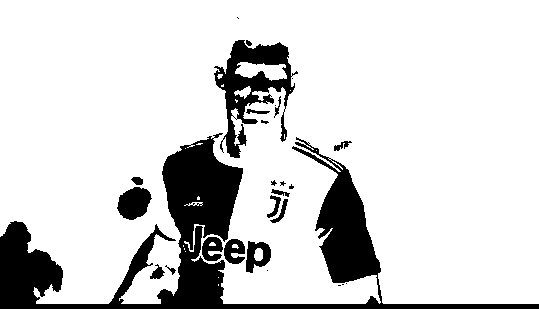

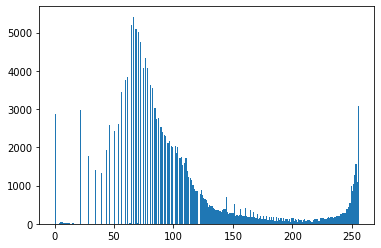

In [51]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow


def balanced_hist_thresholding(im):

    t0 = np.random.choice(range(256))

    while (True):

      temp1 = im[im <= t0]

      temp2 = im[im > t0]

      m1 = np.mean(temp1)

      m2 = np.mean(temp2)

      if t0 == round((m1+m2)/2): break

      t0 = round((m1+m2)/2)

    
    return t0




    return i_m

im = cv2.imread('/content/ronaldo.png', cv2.IMREAD_GRAYSCALE)

b = plt.hist(im.ravel(),256,[0,256])

cv2_imshow(im)


im_th = np.ones(im.shape)*255

im_th[im < balanced_hist_thresholding(im)] = 0

im_th -= 255
im_th*=-1

cv2_imshow(im_th)




# Q2.1

## classify image pixels into more the onw categories based on some intensity levels so as to analyze image in terms of regions

# Q2.2

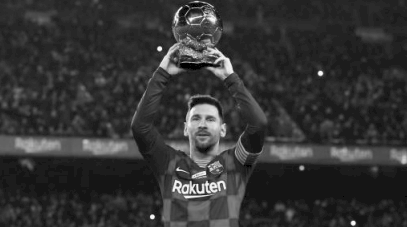

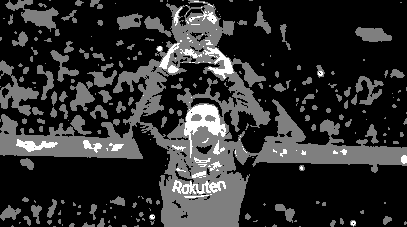

In [47]:
im = cv2.imread('/content/messi.png', cv2.IMREAD_GRAYSCALE)

cv2_imshow(im)

im_th = np.zeros(im.shape)

im_th[(im < 150) & (im >= 50)] = 127

im_th [ (im >= 150) & (im < 250)] = 255

cv2_imshow(im_th)

# Q3.1

## Region Labeling is to automatically assign semantic labels to the corresponding image regions.

# Q3.2

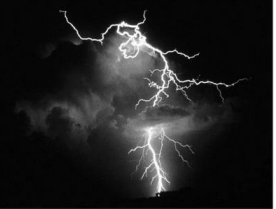

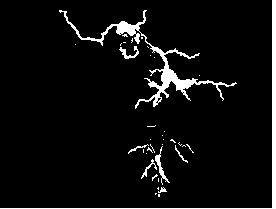

In [78]:
import numpy as np
import cv2
 
class Point(object):
    def __init__(self,x,y):
        self.x = x
        self.y = y
 
    def getX(self):
        return self.x
    def getY(self):
        return self.y
 
def getGrayDiff(img,currentPoint,tmpPoint):
    return abs(int(img[currentPoint.x,currentPoint.y]) - int(img[tmpPoint.x,tmpPoint.y]))
 
def selectConnects(p):
    if p != 0:
        connects = [Point(-1, -1), Point(0, -1), Point(1, -1), Point(1, 0), Point(1, 1), \
                    Point(0, 1), Point(-1, 1), Point(-1, 0)]
    else:
        connects = [ Point(0, -1),  Point(1, 0),Point(0, 1), Point(-1, 0)]
    return connects
 
def regionGrow(img,seeds,thresh,p = 1):
    height, weight = img.shape
    seedMark = np.zeros(img.shape)
    seedList = []
    for seed in seeds:
        seedList.append(seed)
    label = 1
    connects = selectConnects(p)
    while(len(seedList)>0):
        currentPoint = seedList.pop(0)
 
        seedMark[currentPoint.x,currentPoint.y] = label
        for i in range(8):
            tmpX = currentPoint.x + connects[i].x
            tmpY = currentPoint.y + connects[i].y
            if tmpX < 0 or tmpY < 0 or tmpX >= height or tmpY >= weight:
                continue
            grayDiff = getGrayDiff(img,currentPoint,Point(tmpX,tmpY))
            if grayDiff < thresh and seedMark[tmpX,tmpY] == 0:
                seedMark[tmpX,tmpY] = label
                seedList.append(Point(tmpX,tmpY))
    return seedMark
 
 
img = cv2.imread('/content/lightnning.png',0)
cv2_imshow(img)
seeds = [Point(10,10)]
binaryImg = regionGrow(img,seeds,13)

cv2_imshow((binaryImg-1)*-255)